In [4]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt  
from scipy.signal import savgol_filter

In [158]:
im = Image.open('awifs_ndvi_201701_15_1_clipped.tif')
imarray = np.array(im)

In [182]:
pix_2017 = []
pix_2018 = []
i = 1000
j = 1000

In [183]:
for filename in os.listdir(os.getcwd()):
    if filename.endswith("2_clipped.tif"):
        im = Image.open(filename)
        imarray = np.array(im)
        imarray =  imarray/255
        print(imarray[i][j])
        if filename.startswith("awifs_ndvi_2017"):
            pix_2017.append(imarray[i][j])
        else:
            pix_2018.append(imarray[i][j])
            


0.34901960784313724
0.22745098039215686
0.21176470588235294
0.27450980392156865
0.396078431372549
0.2901960784313726
0.29411764705882354
0.4627450980392157
0.49019607843137253
0.2627450980392157
0.38823529411764707
0.396078431372549
0.3058823529411765
0.3254901960784314
0.30196078431372547
0.2980392156862745
0.21176470588235294
0.39215686274509803
0.0784313725490196
0.39215686274509803
0.29411764705882354
0.050980392156862744
0.043137254901960784
0.10588235294117647


In [185]:
pix_2017 = np.array(pix_2017)
pix_2018 = np.array(pix_2018)


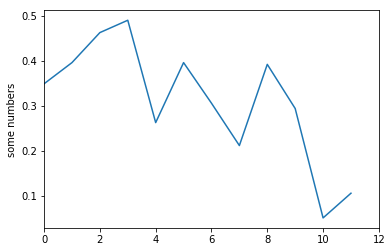

In [186]:
plt.plot(pix_2017)
plt.ylabel('some numbers')
plt.xlim(0,12)
plt.show()

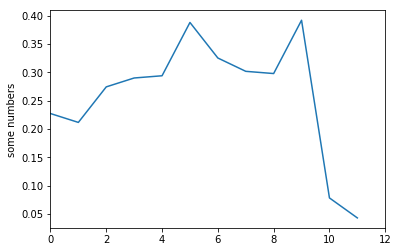

In [187]:
plt.plot(pix_2018)
plt.ylabel('some numbers')
plt.xlim(0,12)
plt.show()

In [188]:
print(len(pix_2017), len(pix_2018))

12 12


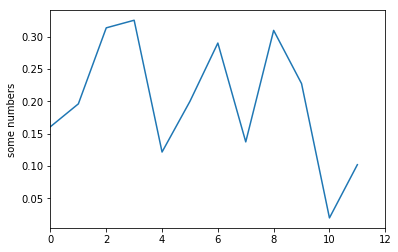

In [165]:
plt.plot(pix_2017)
plt.ylabel('some numbers')
plt.xlim(0,12)
plt.show()


In [189]:
def smoothing(arr, n=10):
    a = arr[:]
    for i in range(1,n):
        if a[i+1] > 1.2 * a[i] or a[i+1] < 0.8 * a[i]:
            a[i] = (a[i-1] + a[i+1])/2
    return a

res = smoothing(pix_2017, 10)

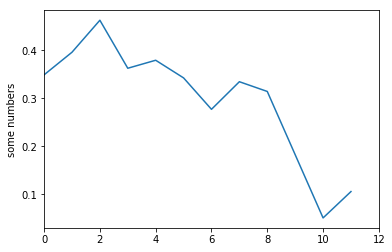

In [190]:
plt.plot(res)
plt.ylabel('some numbers')
plt.xlim(0,12)
plt.show()

In [191]:
def interpolate(inp, fi):
    i, f = int(fi // 1), fi % 1  # Split floating-point index into whole & fractional parts.
    j = i+1 if f > 0 else i  # Avoid index error.
    return (1-f) * inp[i] + f * inp[j]

In [192]:
inp = pix_2017
new_len = 48

delta = (len(inp)-1) / (new_len-1)
outp = [interpolate(inp, i*delta) for i in range(new_len)]

print(inp)
print(outp)

[0.34901961 0.39607843 0.4627451  0.3627451  0.37941176 0.34264706
 0.27720588 0.33468137 0.31439951 0.18268995 0.05098039 0.10588235]
[0.34901960784313724, 0.3600333750521485, 0.37104714226115976, 0.382060909470171, 0.3930746766791823, 0.40742594910304547, 0.42302878598247806, 0.4386316228619107, 0.45423445974134335, 0.45210680016687527, 0.42870254484772635, 0.40529828952857744, 0.38189403420942847, 0.36345431789737176, 0.3673550271172299, 0.3712557363370881, 0.37515644555694616, 0.3790571547768043, 0.3715894868585732, 0.36298498122653317, 0.35438047559449315, 0.345775969962453, 0.33290050062578225, 0.31758448060075095, 0.30226846057571966, 0.28695244055068836, 0.2820974134334585, 0.2955491239048811, 0.30900083437630377, 0.32245254484772634, 0.3342498435544431, 0.32950302461410097, 0.3247562056737589, 0.32000938673341683, 0.3152625677930747, 0.289178530454735, 0.2583528890279515, 0.22752724760116821, 0.1967016061743847, 0.1658759647476012, 0.13505032332081768, 0.10422468189403417, 0.0

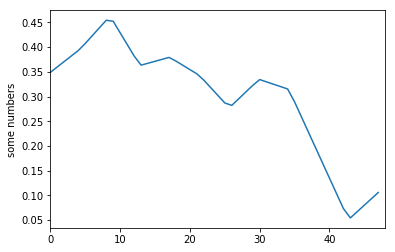

In [193]:
plt.plot(outp)
plt.ylabel('some numbers')
plt.xlim(0,new_len)
plt.show()

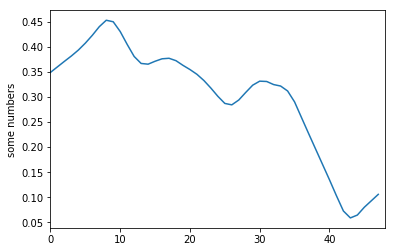

In [194]:
res = savgol_filter(outp, 5, 3)
plt.plot(res)
plt.ylabel('some numbers')
plt.xlim(0,new_len)
plt.show()

In [202]:
from scipy.signal import find_peaks as fp

In [207]:
print(fp(res))

(array([ 8, 17, 30]), {})


In [209]:
!pip install oct2py

     |████████████████████████████████| 51kB 529kB/s 
     |████████████████████████████████| 215kB 684kB/s 
     |████████████████████████████████| 204kB 1.4MB/s 


In [210]:
import peakutils

ModuleNotFoundError: No module named 'peakutils'

In [211]:
!pip install peakutils

  Created wheel for peakutils: filename=PeakUtils-1.3.2-cp37-none-any.whl size=7620 sha256=a975c343a2ef9add6b6ad3635b49614043078974b91e8194d61820b69e87eab4
  Stored in directory: /home/shivamani/.cache/pip/wheels/6d/52/9c/94cff100c9dd4ec0c72762947b8d5da6f6c0762cd5312b04ec
Successfully built peakutils


In [5]:
import peakutils.peak
indexes = peakutils.peak.indexes(np.array(res), min_dist=10)
print('Peaks are: %s' % (indexes))

NameError: name 'res' is not defined

In [6]:

print(indecies)

NameError: name 'indecies' is not defined

In [7]:
def interpolate(inp, fi):
    i, f = int(fi // 1), fi % 1  # Split floating-point index into whole & fractional parts.
    j = i+1 if f > 0 else i  # Avoid index error.
    return (1-f) * inp[i] + f * inp[j]

In [8]:
val=[]
indecies = [i for i in range(100,2000,200)]
for i in indecies:
    for j in indecies:
        val.append([i,j])

In [27]:
harvest_dates = []
cycles = []

for v in val:
    pix_2017 = []
    for filename in os.listdir(os.getcwd()):
        if filename.endswith("2_clipped.tif"):
            im = Image.open(filename)
            imarray = np.array(im)
            imarray =  imarray/255
            if filename.startswith("awifs_ndvi_2017"):
                pix_2017.append(imarray[v[0]][v[1]])
        inp = pix_2017
    new_len = 48
    delta = (len(inp)-1) / (new_len-1)
    outp = [interpolate(inp, i*delta) for i in range(new_len)]
    res = savgol_filter(outp, 5, 3)
    indexes = peakutils.peak.indexes(np.array(res), min_dist=10)
    indexes_mod = [i//4 for i in indexes]
    harvest_dates.append(indexes_mod)
    cycles.append(len(indexes) )


            


In [28]:
import cv2

In [31]:
image = cv2.imread('awifs_ndvi_201701_15_2_clipped.tif') 

In [33]:
for i in range(len(val)):
    if cycles[i] == 1:
        colour = (0,255,0)
    elif cycles[i] == 2:
        colour = (255,0,0)
    else:
        colour = (0,255,0)
    image = cv2.circle(image,(val[i][0], val[i][1]), 16, colour, -3)
cv2.imwrite('abc.tif', image) 

True